# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/CLV.csv")


In [4]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,)], 
    "activation" : ['relu','logistic']
}

In [11]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5)]})

In [12]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (20, 5)}


# 3.) Train a model with the optimal solution from GridSearch

In [13]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(20, 5))

In [14]:
p_dict = {
    "hidden_layer_sizes": (10,), 
    "activation" : 'relu'
}

model1 = MLPRegressor(**p_dict)

#=======EQUIVALENT TO========

# MLPRegressor(hidden_layer_sizes = (10,), 
             # activation = "relu")

In [15]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,))

# 4.) What are the in-sample and out of sample MSEs

In [16]:
from sklearn.metrics import mean_squared_error

# Compute in-sample MSE
y_pred_train = model1.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

93377078.55053075

In [17]:
# Compute out-of-sample MSE
y_pred_test = model1.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

100460235.93464424

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [18]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Define model architecture
model2 = Sequential()
model2.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1, activation='softmax'))

In [20]:
# Compile model
model2.compile(optimizer = Adam(lr = 0.01), loss='mean_squared_error')

# Train model
model2.fit(X_train, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 109038792.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 109038752.0000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 109038760.0000
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 109038776.0000
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 109038792.0000
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 109038776.0000
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 109038744.0000
Epoch 8/100
200/200 [==============================] - 1s 3ms/step - loss: 109038792.0000
Epoch 9/100
200/200 [==============================] - 1s 3ms/step - loss: 109038760.0000
Epoch 10/100
200/200 [==============================] - 1s 3ms/step - loss: 109038760.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 109038800.0000
Epoch 12

In [21]:
# Save Model
keras.models.save_model(model2, "/folder")

In [22]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Evaluate model on test set
test_loss = model2.evaluate(X_test, y_test)

86/86 [==============================] - 0s 2ms/step - loss: 116467624.0000


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [26]:
from tensorflow.keras.utils import plot_model
from ann_visualizer.visualize import ann_viz

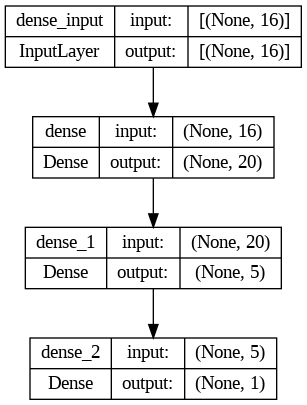

In [27]:
# Visualize model architecture using plot_model
plot_model(model2, show_shapes=True)

In [28]:
# Visualize model topology using ann_viz
ann_viz(model2, title="Neural Network Topology", view=True, filename="network")